In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data  as pdr


In [10]:
start = '2010-01-01'
end = '2019-12-31'
import yfinance as yf
yf.pdr_override()
df =pdr.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800


In [16]:
df = df.reset_index()

In [18]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

KeyError: "['Date', 'Adj Close'] not found in axis"

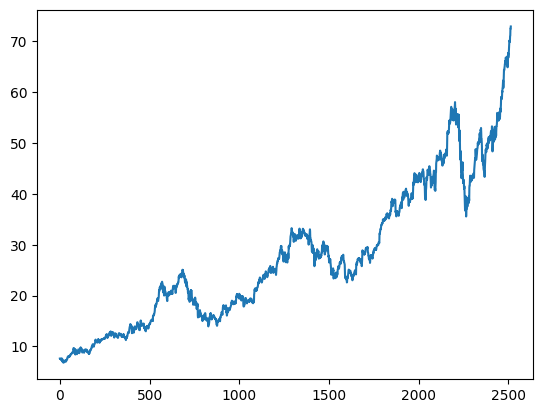

In [21]:
plt.plot(df.Close)

In [22]:
#100 days moving avg
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

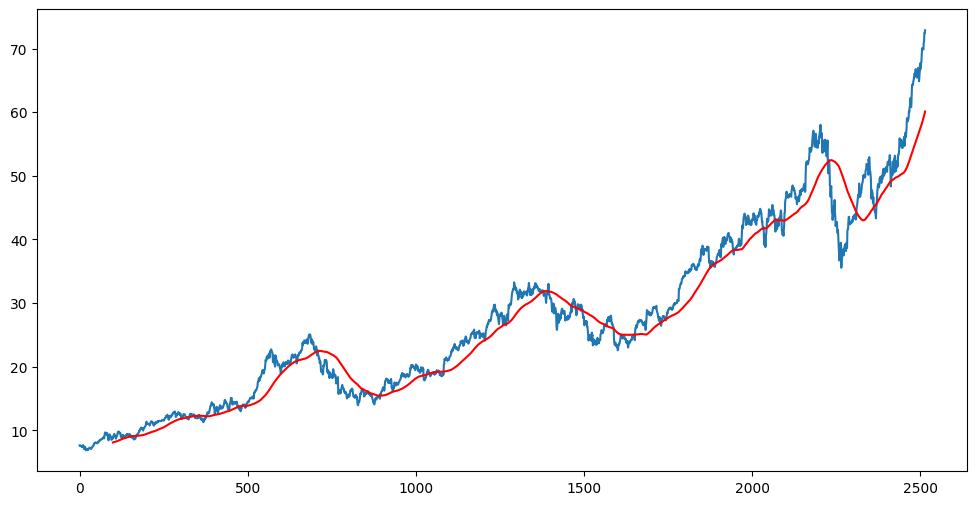

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [24]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

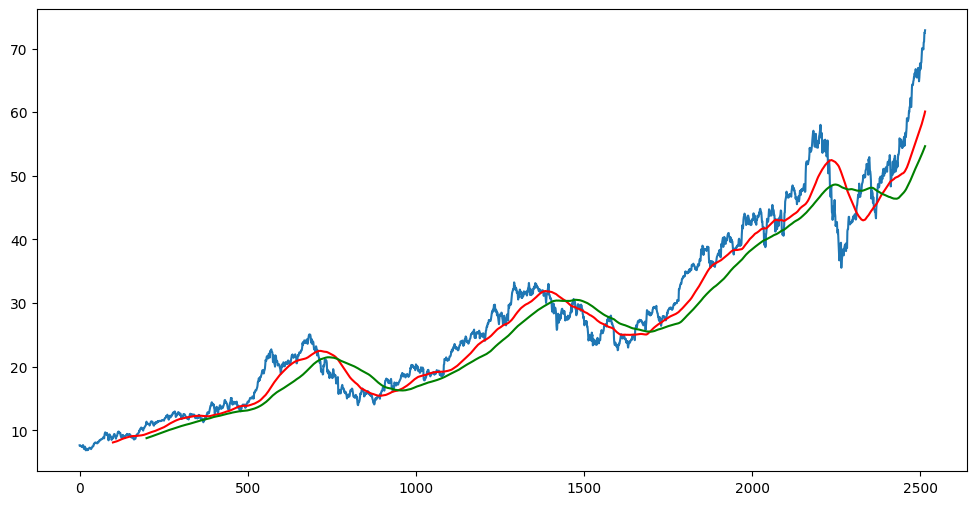

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [40]:
df.loc[-1]=[00,0,0,0,0]
df.loc[-2]=[00,0,0,0,0]

df.shape

(2517, 5)

In [44]:
#spliiting data into training and testing 

# data_training = pd.DataFrame(df['Close'][0 : int(len(df))*0.70])
# data_test=pd.DataFrame(df['Close'][int(len(df))*0.70 : int(len(df))])

data_training = pd.DataFrame(df['Close'][0 : 1761])
data_test=pd.DataFrame(df['Close'][1761 : int(len(df))])

print("training data shape :",data_training.shape)
print("testing data shape",data_test.shape)

training data shape : (1761, 1)
testing data shape (756, 1)


In [46]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))

In [47]:
data_training_array =Scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [50]:
x_train =[]
y_train =[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
from keras.layers import Dense ,Dropout ,LSTM 
from keras.models import Sequential

from keras.callbacks import EarlyStopping

from keras.callbacks import ModelCheckpoint


In [56]:
model =Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


c:\Users\sansk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - loss: 0.1146
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0137
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0095
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0093
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0096
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0096
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0093
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0079
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0081
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0075
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0079
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0068
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0063
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0057
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.005

In [61]:
model.save("keras_model.h5")


In [62]:
data_test.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [66]:
past_100_days =data_training.tail(100)


In [72]:
# final_df =past_100_days.append(data_test, ignore_index=True)
final_df=pd.concat([past_100_days,data_test],ignore_index=True)
final_df

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001
...,...
851,72.477501
852,72.449997
853,72.879997
854,0.000000


In [73]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [74]:
input_data= Scaler.fit_transform(final_df)
input_data

array([[0.37325055],
       [0.37047202],
       [0.3702319 ],
       [0.37108948],
       [0.37554887],
       [0.37520582],
       [0.37465699],
       [0.37417675],
       [0.37513723],
       [0.37222148],
       [0.37338777],
       [0.37057493],
       [0.36899699],
       [0.36683592],
       [0.36642427],
       [0.36361143],
       [0.36395445],
       [0.36611556],
       [0.36954585],
       [0.36944292],
       [0.37170693],
       [0.36196488],
       [0.35376647],
       [0.36169047],
       [0.3703005 ],
       [0.38340423],
       [0.39643937],
       [0.39420967],
       [0.38961308],
       [0.38957877],
       [0.38951018],
       [0.3931806 ],
       [0.38662872],
       [0.38721186],
       [0.38793222],
       [0.39088228],
       [0.38481066],
       [0.38779503],
       [0.38597695],
       [0.38762351],
       [0.38779503],
       [0.39067647],
       [0.39125961],
       [0.39808592],
       [0.39894349],
       [0.40251098],
       [0.4012761 ],
       [0.403

In [75]:
input_data.shape

(856, 1)

In [76]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [77]:
x_test,y_test = np.array(x_test),np.array(y_test)


In [78]:
y_prediction=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step


In [79]:
y_prediction

array([[0.39468315],
       [0.3956816 ],
       [0.39626783],
       [0.3964774 ],
       [0.3964021 ],
       [0.39620042],
       [0.39607242],
       [0.39617115],
       [0.39660853],
       [0.397389  ],
       [0.3984368 ],
       [0.39969057],
       [0.4010785 ],
       [0.40250903],
       [0.4039029 ],
       [0.4051993 ],
       [0.40634766],
       [0.40741062],
       [0.40846214],
       [0.40954584],
       [0.4106508 ],
       [0.41172376],
       [0.41311026],
       [0.4151243 ],
       [0.41793066],
       [0.42151114],
       [0.4256654 ],
       [0.43010157],
       [0.43451023],
       [0.43866408],
       [0.4424364 ],
       [0.44580287],
       [0.44877893],
       [0.45137578],
       [0.45360938],
       [0.4555211 ],
       [0.4571587 ],
       [0.458541  ],
       [0.45968097],
       [0.4605992 ],
       [0.46132037],
       [0.46194896],
       [0.46255052],
       [0.4631762 ],
       [0.46383354],
       [0.46451116],
       [0.46516854],
       [0.465

In [80]:
y_prediction.shape

(756, 1)

In [81]:
Scaler.scale_

array([0.01372119])

In [82]:
scale_factor=1/0.01372119
y_prediction=y_prediction*scale_factor
y_test=y_test*scale_factor
# y_prediction=y_prediction.astype(int)

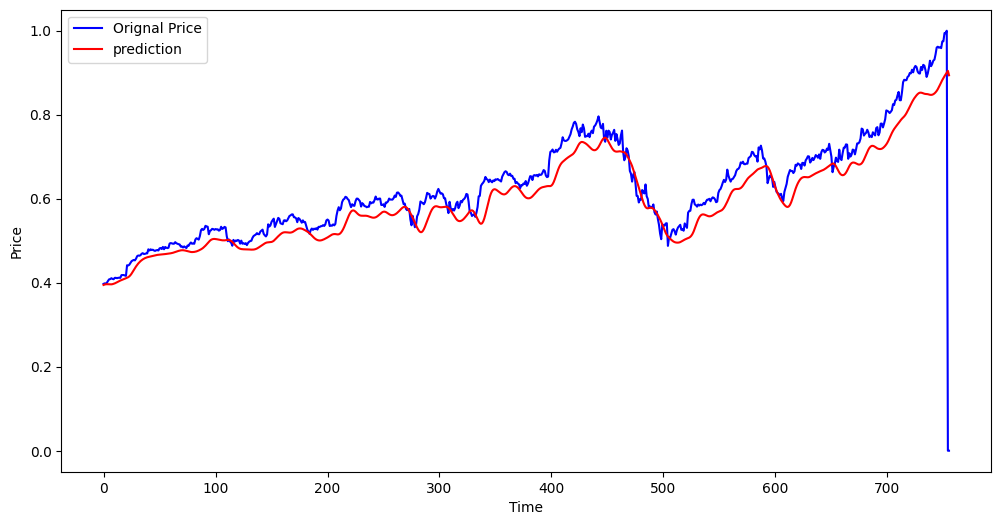

In [84]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Orignal Price')
plt.plot(y_prediction,'r',label="prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()